In [ ]:
#!pip install opencv-python

# Імпортуємо бібліотеки

In [2]:
from os import listdir
import cv2
import numpy as np
import matplotlib.pyplot as plt

import keras

from sklearn.utils import shuffle

Using TensorFlow backend.


# Корисні функції
Ці функціх будуть використані у подальшому для спрощення певних процесів

In [3]:
# Зчитуємо всі зображення, що знаходяться у певній папці
def read_all_img_in_folder(path):
    # отримуємо список всіх зображень у папці
    img_names = listdir(path)
    
    imgs_lst = []
    imgs_lbl_lst = []
    
    for index, filename in enumerate(img_names):
        label = filename[0]
        
        img_path = path + filename
        
        img_raw = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        img = cv2.bitwise_not(img_raw) # інверсія значень піеселів, потрібна щоб привести зображення до вигляду як у Keras.mnist
        
        imgs_lst.append(img)
        imgs_lbl_lst.append(label)
    
    return imgs_lst, imgs_lbl_lst

# промальовуємо конкретне зображення на графіку matplotlib
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary) # зображення чорно-біле
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    # підписи під зображеннями - мітки класів
    plt.xlabel("predicted {} {:2.0f}% actual {}".format(
        predicted_label,
        100*np.max(predictions_array),
        true_label),
        color = color)

# відмальовує стовпці імовірностей приналежності даних до конкретного класу
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

# відфільтрувати лише ті зображення, які не розпізнанні 
def only_unpredicted(predictions, true_labels):
    result = []
    
    for i in range(len(predictions)):
        max_val = np.argmax(predictions[i])
        if max_val != true_labels[i]:
            result.append(i)
    return result

# Завантаження даних

Завантажуємо тренувальний сет зображень

In [4]:
img_dir = "MNIST_data/train/6000/"

train_img, train_labels = read_all_img_in_folder(img_dir)

train_img = np.array(train_img, dtype='float')
train_labels = np.array(train_labels, dtype='float')

Завантажуємо тестовий сет зображень

In [5]:
img_test_dir = "MNIST_data/test/1000/"

test_img, test_labels = read_all_img_in_folder(img_test_dir)

test_img = np.array(test_img, dtype='float')
test_labels = np.array(test_labels, dtype='float')

Вивід зображення із тренувального сету

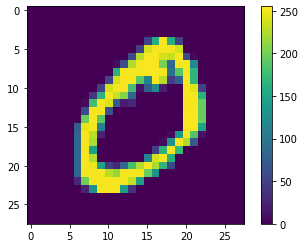

In [6]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Робота з зображеннями

Нормалізація зображення

In [7]:
train_img = train_img / 255.0

test_img = test_img / 255.0

Перемішуємо масиви з зображеннями

In [8]:
train_img, train_labels = shuffle(train_img, train_labels, random_state=0)
test_img, test_labels = shuffle(test_img, test_labels, random_state=0)

# https://issue.life/questions/4601373

Виведемо на екран перші 25 елементі із тренувального набору

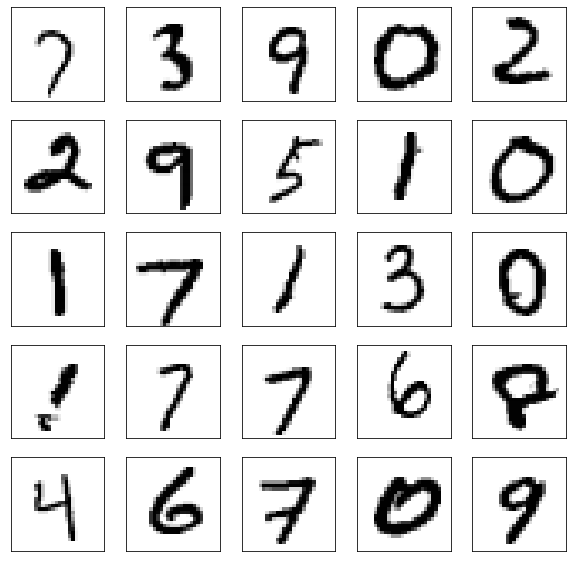

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i], color="white")
plt.show()

# Нейронна марежа

Створюємо глибоку нейронну мережу

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy'
    ]
)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [11]:
history = model.fit(
    train_img,
    train_labels,
    epochs=200,
    shuffle=True,
    validation_data=(test_img, test_labels)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6000 samples, validate on 1000 samples
Epoch 1/200
6000/6000 [==============================] - 1s 199us/step - loss: 0.9436 - acc: 0.7112 - val_loss: 0.4418 - val_acc: 0.8660
Epoch 2/200
6000/6000 [==============================] - 1s 127us/step - loss: 0.3747 - acc: 0.8882 - val_loss: 0.3279 - val_acc: 0.8870
Epoch 3/200
6000/6000 [==============================] - 1s 152us/step - loss: 0.2693 - acc: 0.9213 - val_loss: 0.2759 - val_acc: 0.9110
Epoch 4/200
6000/6000 [==============================] - 1s 143us/step - loss: 0.2051 - acc: 0.9385 - val_loss: 0.2439 - val_acc: 0.9200
Epoch 5/200
6000/6000 [==============================] - 1s 152us/step - loss: 0.1570 - acc: 0.9525 - val_loss: 0.2331 - val_acc: 0.9240
Epoch 6/200
6000/6000 [==============================] - 1s 145us/step - loss: 0.1339 - acc: 0.9597 - val_loss: 0.2141 - val_acc: 0.9250
Epoch 7/200
6000/6000 [=============

# Візуалізація якості навчання

In [12]:
# продемонструємо доступні метрики для візуалізації якості навчання
# список метрик змінюватиметься в залежності від вибраних метрик на етапі компіляції моделі
for history_metric in history.history:
    print(history_metric)

val_loss
val_acc
loss
acc


In [13]:
# Формування списків метрик для візуалізації якості навчання
loss = history.history['loss']  # наскільки точно модель 'впізнає' дані із тренувального набору
val_loss = history.history['val_loss']  # точність розпізнання даних із тестового набору

accuracy = history.history['acc']  # кількість невірно розпізнаних даних на тренувальному наборі
val_accuracy = history.history['val_acc']  # кількість невірно розпізнаних даних на тестовому наборі

epochs_passed = range(1, len(loss) + 1)  # кількість епох навчання моделі

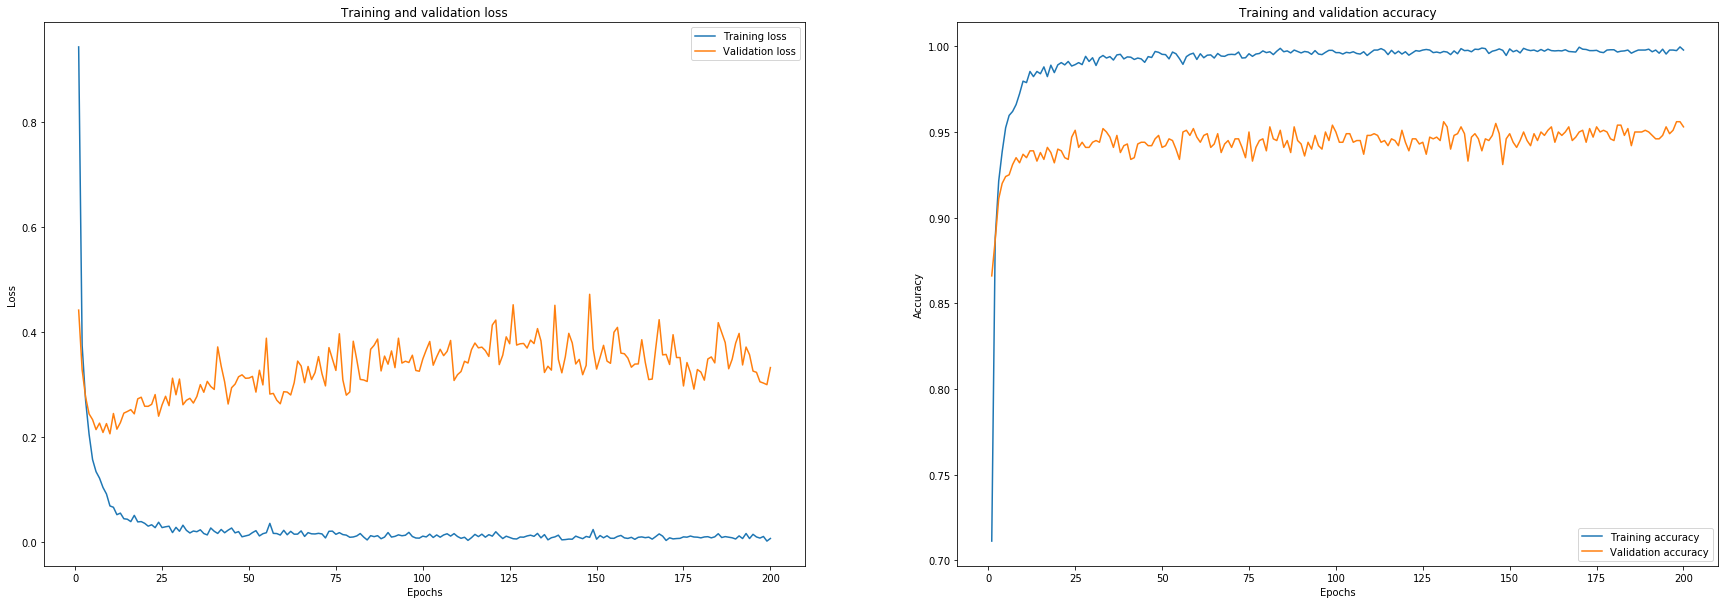

In [14]:
plt.figure(figsize=(30,10))

plt.subplot(1, 2, 1)

plt.plot(epochs_passed, loss, label='Training loss')
plt.plot(epochs_passed, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_passed, accuracy, label='Training accuracy')
plt.plot(epochs_passed, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Оцінка якості навчання нейронної мережі

Оцінка точності моделі на тестовому наборі зображень

In [15]:
test_loss, test_acc = model.evaluate(test_img, test_labels, verbose=2)

print('\nТочність на провірочних даних: ', test_acc*100.)


Точність на провірочних даних:  95.3


Класифікація тестових зображень

In [16]:
predictions = model.predict(test_img)
predictions[0]  # імовірність приналежності розпізнаного зображення до конкретного класу

array([3.38541355e-08, 1.09524700e-08, 1.05165526e-07, 2.33239052e-06,
       4.52432781e-04, 9.55648716e-07, 1.49270679e-10, 6.00014871e-04,
       6.59433738e-07, 9.98943508e-01], dtype=float32)

Вивід зображень разом із візуалізованим вектором передбачоної мітки класу

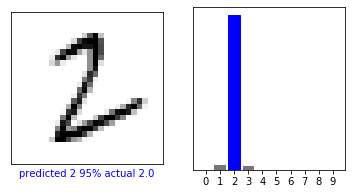

In [17]:
i = 63

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_img)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

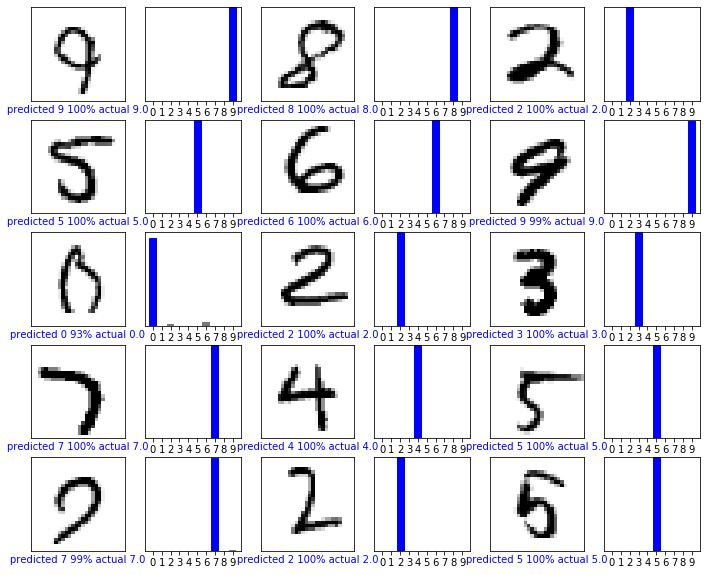

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

# Помилкова класифікація зображень
Виведемо лише ті зображення, з тестового набору, які були не вірно класифіковані

In [19]:
unpredicted_indexes = only_unpredicted(predictions, test_labels)

Загальна кількість не вірно класифікованих зображень -  95


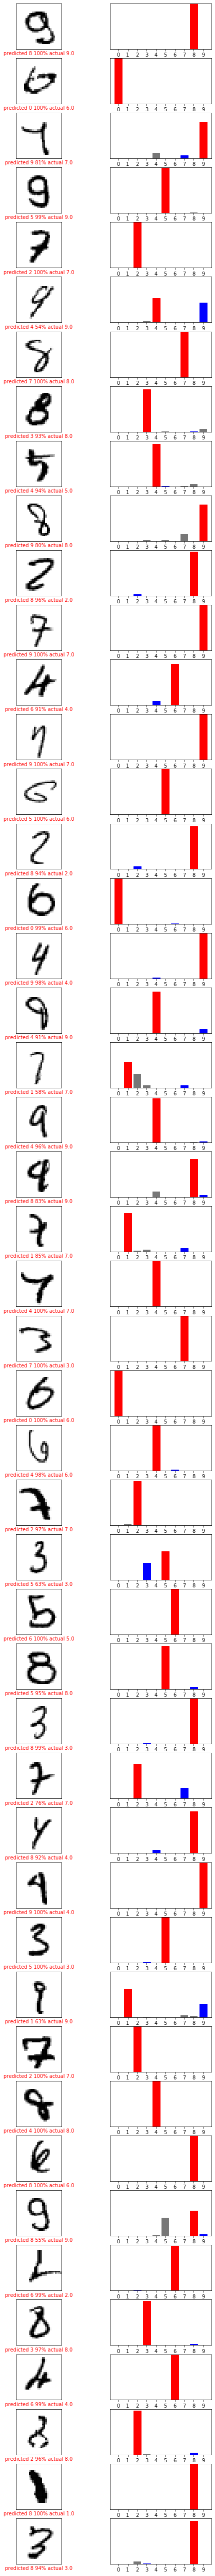

In [20]:
counter = 1

num_rows = len(unpredicted_indexes)
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in unpredicted_indexes:
    plt.subplot(num_rows, num_cols, counter)
    plot_image(i, predictions, test_labels, test_img)
    counter = counter + 1
    
    plt.subplot(num_rows, num_cols, counter)
    plot_value_array(i, predictions, test_labels)
    counter = counter + 1

print("Загальна кількість не вірно класифікованих зображень - ", counter)
    
plt.show()